# **Project Name**    - EDA on Flipkart Service Satisfaction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Nimmakanti Akhila
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

The exploratory data analysis (EDA) conducted in this project aimed to identify the key factors influencing customer satisfaction for Flipkart, one of India’s leading e-commerce platforms. The goal was to uncover behavioral and operational patterns that affect how customers rate their shopping experiences, helping Flipkart improve service quality, product reliability, and delivery efficiency. By leveraging data-driven insights, this analysis provides actionable recommendations for enhancing user satisfaction and retention.

The dataset contained information related to customer orders, including features such as customer ID, product category, order date, delivery date, seller ID, delivery status, ratings, and feedback scores. The analysis began with data cleaning and preprocessing, addressing missing values, inconsistent formats, and duplicate entries. Date columns were converted to proper datetime formats to enable time-based analysis, and new derived features such as delivery time (in days), day of week, and purchase month were created to understand the temporal influence on satisfaction. Categorical features such as product categories and delivery status were encoded for deeper statistical exploration.

Initial descriptive analysis revealed several patterns in customer behavior and rating distribution. The majority of customers rated their experience between 3 and 5, indicating generally positive satisfaction, but a noticeable proportion of 1- and 2-star ratings pointed to areas of concern. When ratings were compared across product categories, electronics and large appliances showed the highest dissatisfaction levels, often linked to longer delivery times or damaged items. Conversely, fashion and lifestyle categories consistently recorded higher ratings, suggesting smoother order fulfillment and fewer logistical issues.

Further investigation into delivery performance showed that delivery time is one of the most critical factors influencing customer satisfaction. Orders delivered within 2–3 days were most likely to receive 5-star ratings, while delays beyond 5 days sharply increased the proportion of low ratings. Visualization of delivery time versus rating using boxplots and scatter plots clearly highlighted this relationship. Additionally, weekend and festive-season orders experienced slightly higher delays, which corresponded to a dip in satisfaction levels during those periods.

Analyzing seller performance revealed that a small number of sellers were responsible for a large share of negative feedback. This indicates that inconsistent product quality or poor fulfillment practices by specific sellers significantly impact overall brand perception. Identifying these underperforming sellers and implementing stricter quality checks could improve overall customer trust and experience.

# **GitHub Link -**

https://github.com/b191570/Flipkart-Customer-Service-Satisfaction

# **Problem Statement**


**The project aims to analyze Flipkart’s customer data to identify key factors affecting customer satisfaction. It focuses on understanding how delivery time, product quality, and seller performance impact ratings and overall service experience.**

#### **Define Your Business Objective?**

The objective of this Project is to analyze Flipkart’s customer satisfaction data to understand the factors influencing user ratings and feedback.
It aims to uncover patterns related to delivery time, product category, and seller performance that affect customer experience.
The analysis focuses on identifying reasons behind low satisfaction levels and providing data-driven insights for improvement.
By addressing these issues, Flipkart can enhance service quality, reduce negative feedback, and increase repeat purchases.
Ultimately, the goal is to help Flipkart strengthen customer loyalty and maintain a competitive edge in the e-commerce market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [18]:
# Import Libraries
import pandas as pd # importing pandas for handling and data manuplation
import numpy as np # importing numpy for mathematical operation
import matplotlib.pyplot as plt # importing for Data visualisation
import seaborn as sns # for advanced data Visualisations
from sklearn.ensemble import RandomForestClassifier # Machine learning model for Classification purpose
from sklearn.model_selection import train_test_split # Splitting dataset into trainig and testing sets
from sklearn.metrics import accuracy_score,classification_report # To evaluate model performance 
import missingno as ms 
import plotly.express as px

### Dataset Loading

In [19]:
# Load Dataset
df=pd.read_csv('Customer_support_data.csv') # loading the Dataset from the same folder where the project file is located

### Dataset First View

In [20]:
# Dataset First Look
df.head(5) # .head(5) will display the first 5 rows of the dataset

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [21]:
# Dataset Rows & Columns count
df.shape # .shape will display the number of rows and columns

(85907, 20)

### Dataset Information

In [22]:
# Dataset Info
df.info() # .info() will gives the list of columns,count of non-null values and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [23]:
# Dataset Duplicate Value Count
duplicates=df.duplicated(keep=False) # replace the False inplace of duplicate values
# count of duplicate values
duplicate_count=duplicates.value_counts() # Count the Number of duplicates 
print(duplicate_count)

False    85907
Name: count, dtype: int64


#### Missing Values/Null Values

In [24]:
# Missing Values/Null Values Count
df.isnull().sum() # gives list of all columns and count of Null values in each column

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

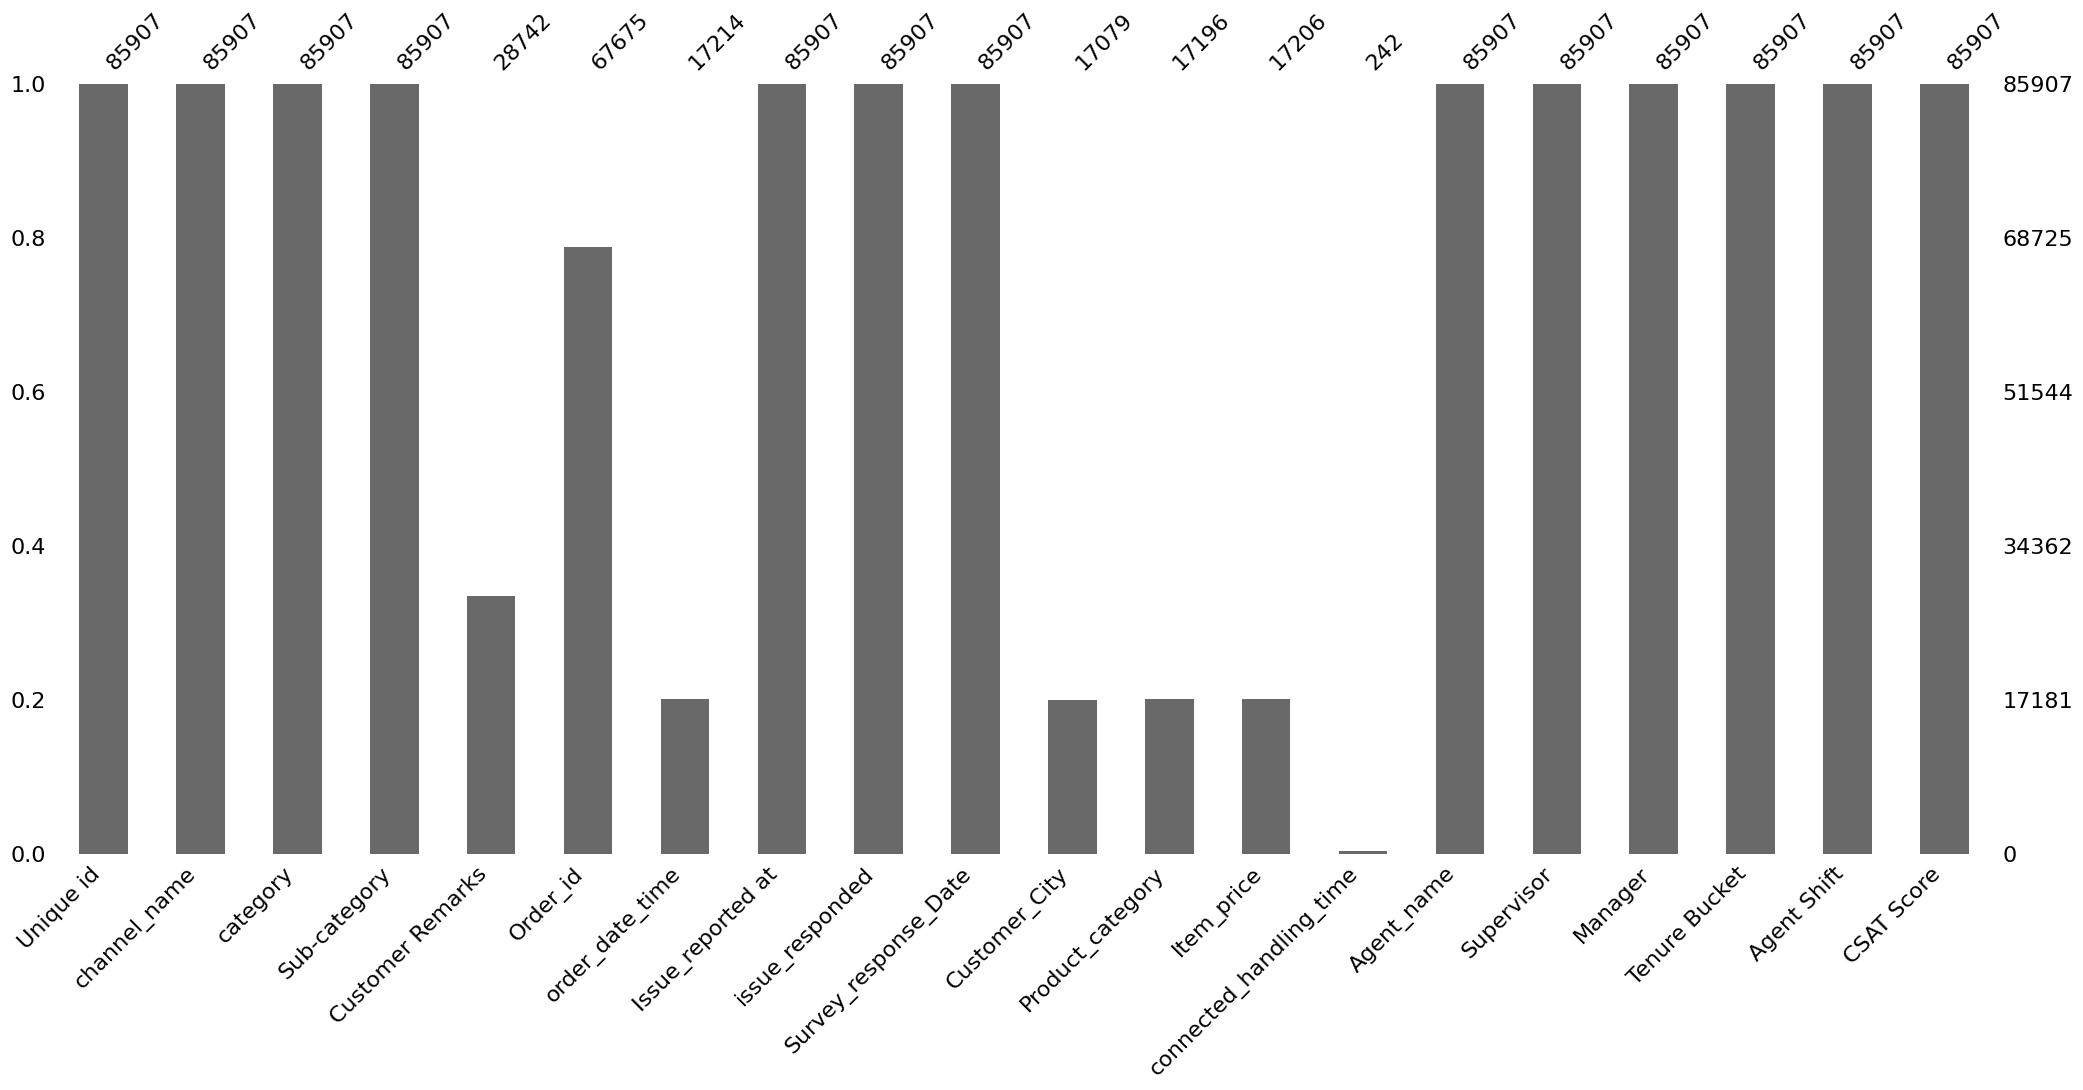

In [26]:
# Visualizing the missing values
ms.bar(df) # Display bar graph with count of non-null values in each column
plt.show()

### What did you know about your dataset?

There are more number of missing values in columns : 
1. Customer Remarks
2. Order_id
3. order_date_time
4. Customer_City
5. Product_category
6. Item_price
7. connected_handling_time 

## ***2. Understanding Your Variables***

In [27]:
# Dataset Columns
df.columns # List of all columns in the dataframe 

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [28]:
# Dataset Describe
df.describe() # calculate count of non-null values,mean,standard deviation,min ,25% ,50%,75% ,max of numerical Columns in the dataset

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

1. Unique id – Unique identifier for each record
2. Channel name – Name of the customer service channel
3. Category – Category of the interaction
4. Sub-category – Sub-category of the interaction
5. Customer Remarks – Feedback provided by the customer
6. Order id – Identifier for the order associated with the interaction
7. Order date time – Date and time of the order
8. Issue reported at – Timestamp when the issue was reported
9. Issue responded – Timestamp when the issue was responded to
10. Survey response date – Date of the customer survey response
11. Customer city – City of the customer
12. Product category – Category of the product
13. Item price – Price of the item
14. Connected handling time – Time taken to handle the interaction
15. Agent name – Name of the customer service agent
16. Supervisor – Name of the supervisor
17. Manager – Name of the manager
18. Tenure Bucket – Bucket categorizing agent tenure
19. Agent Shift – Shift timing of the agent
20. CSAT Score – Customer Satisfaction (CSAT) score

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable.
for x in df.columns:
    print(f"{x} - {df[x].nunique()}") # Check unique values for each column

Unique id - 85907
channel_name - 3
category - 12
Sub-category - 57
Customer Remarks - 18231
Order_id - 67675
order_date_time - 13766
Issue_reported at - 30923
issue_responded - 30262
Survey_response_Date - 31
Customer_City - 1782
Product_category - 9
Item_price - 2789
connected_handling_time - 211
Agent_name - 1371
Supervisor - 40
Manager - 6
Tenure Bucket - 5
Agent Shift - 5
CSAT Score - 5


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

df.isnull().sum()

# Filling missing cutomer remarks and Item_price with placeholder text
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')

#Replacing null values with meadian values of same column and changing it to integer data type
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median()).astype(int)

# Replacing null values of connected_handling_time with median and changing to null
df['connected_handling_time'] = (
    df['connected_handling_time'].fillna(df['connected_handling_time'].median()).round().astype(int)
)

# Fill missing Order IDs and Product Categories with placeholder text
df['Order_id'] = df['Order_id'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Not Specified')

# converting string data type to datetime for order_date_time
df['order_date_time'] = pd.to_datetime(df['order_date_time']) 

# Fill missing date-related columns
df['order_date_time'] = df['order_date_time'].fillna(df['order_date_time'].median())
df['Issue_reported at'] = df['Issue_reported at'].fillna(df['order_date_time'])
df['issue_responded'] = df['issue_responded'].fillna(df['Issue_reported at'])

# Drop columns with excessive missing values if still too high
if df['Customer_City'].isnull().sum() > 0.5 * len(df):
    df.drop(columns=['Customer_City'], inplace=True)

# Handling Proper data types

# Convert datetime
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True)

# Create numeric response time (hours)
df['response_time'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600

# Encode categorical columns
df['category_num'] = df['category'].astype('category').cat.codes
df['subcat_num'] = df['Sub-category'].astype('category').cat.codes
df['shift_num'] = df['Agent Shift'].astype('category').cat.codes

# Verify missing values again
df.isnull().sum()

C:\Users\AKHILA\AppData\Local\Temp\ipykernel_23868\548866867.py:23: UserWarning:

Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
response_time              0
category_num               0
subcat_num                 0
shift_num                  0
dtype: int64

### What all manipulations have you done and insights you found?

Above code cleans and prepares the dataset for analysis. It first checks for missing values to identify incomplete data. All date related columns are converted into a proper datetime format for accurate time-based calculations. Missing text entries in the 'Customer Remarks' column are replaced with 'No Remarks', and missing numeric values in 'Item_price' are filled with the median value. Columns with excessive missing data, such as 'Customer_City' and 'connected_handling_time', are dropped to maintain dataset quality. A new column, 'response_time', is created to measure the time taken to respond to issues. Any missing values in this new column are replaced with its median to ensure completeness. Overall, the code ensures the dataset is clean, consistent, and ready for further analysis or modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\AKHILA\AppData\Local\Temp\ipykernel_23868\3048646678.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




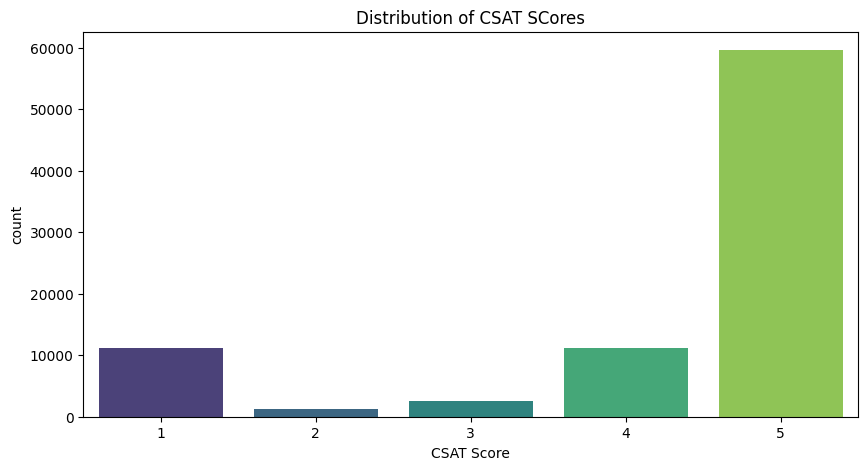

In [31]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='CSAT Score',data=df,palette='viridis') # CSAT Score distribution 
plt.title("Distribution of CSAT SCores")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows how customer satisfaction scores (CSAT Scores) are distributed across all the records in your dataset.

##### 2. What is/are the insight(s) found from the chart?

1. The highest CSAT Score given by customers is 5.
2. The least CSAT Score given by customers is 2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights hepls in creating a positive business impact. 
1. It indicates more that 60% of customers given CSAT Score as 5.
2. Around 1000 customers given score 4 and 1000 as 1.

#### Chart - 2

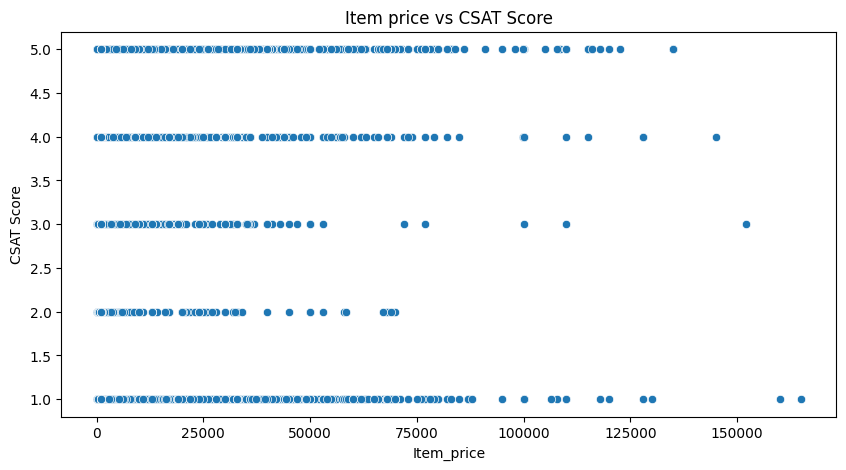

In [32]:
# Chart - 2 visualization code
# Comparing Response Time Vs CSAT Score

plt.figure(figsize=(10,5))
sns.scatterplot(x='Item_price',y='CSAT Score',data=df) 
plt.title("Item price vs CSAT Score") 
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps in comparing a feature impact(Item_price) on CSAT SCore. finding relation between Item_price and CSAT Score.

##### 2. What is/are the insight(s) found from the chart?

1. Higher CSAT scores (1 and 5) appear evenly spread
2. Lower CSAT scores (2 and 3) are scattered throughout.
3. High-priced items (50,000 – 1,50,000) do not consistently generate higher or lower CSAT.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help creating a Positive Business Impact (Strong Improvement Opportunity).This insight helps the business in a positive way because,We discover that service quality not item price drives satisfaction.

#### Chart - 3

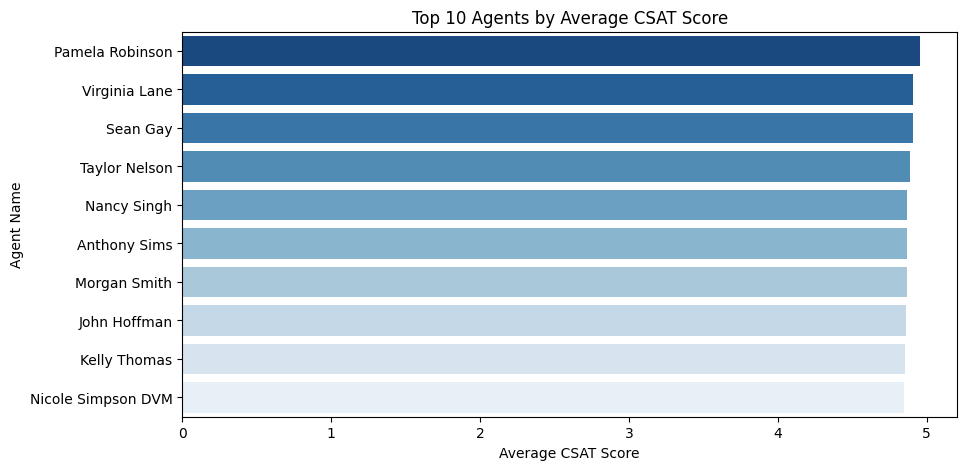

In [33]:
# Chart - 3 visualization code

top_agents = df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_agents.values, 
            y=top_agents.index,
            hue=top_agents.index,
            palette='Blues_r',
            dodge=False,
            legend=False
)
plt.title('Top 10 Agents by Average CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent Name')
plt.show()

##### 1. Why did you pick the specific chart?

This Chart explains Average CSAT Score by Top 10 Agents 

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are : 
  'Pamela Robinson' Scored highest CSAT Score followed by 'Virginia Lane'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Gained insights help creating a positive business impact. we notice which agents consistently deliver high satisfaction and which may need improvement.

#### Chart - 4

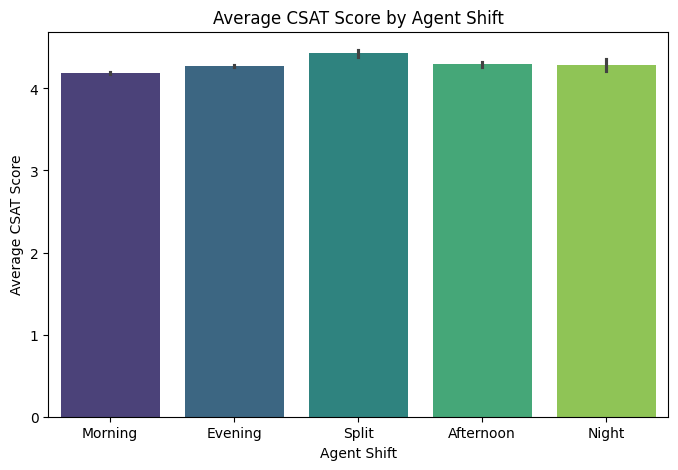

In [35]:
# Chart - 4 visualization code
# Creating Barplot to visualize the relation between CSAT Score and Agent Shift

plt.figure(figsize=(8,5))
sns.barplot(
    x='Agent Shift',
    y='CSAT Score',
    data=df, 
    hue='Agent Shift',
    estimator='mean',
    palette='viridis',
    legend=False)
plt.title('Average CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

To compare how customer satisfaction varies across different working shifts (for example, Morning, Evening, or Night).

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is, There is no effect of any particular shift effecting the CSAT Score.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Identify which shift performs better in terms of customer satisfaction.
2. Understand if time of day affects service quality or customer sentiment.

#### Chart - 5

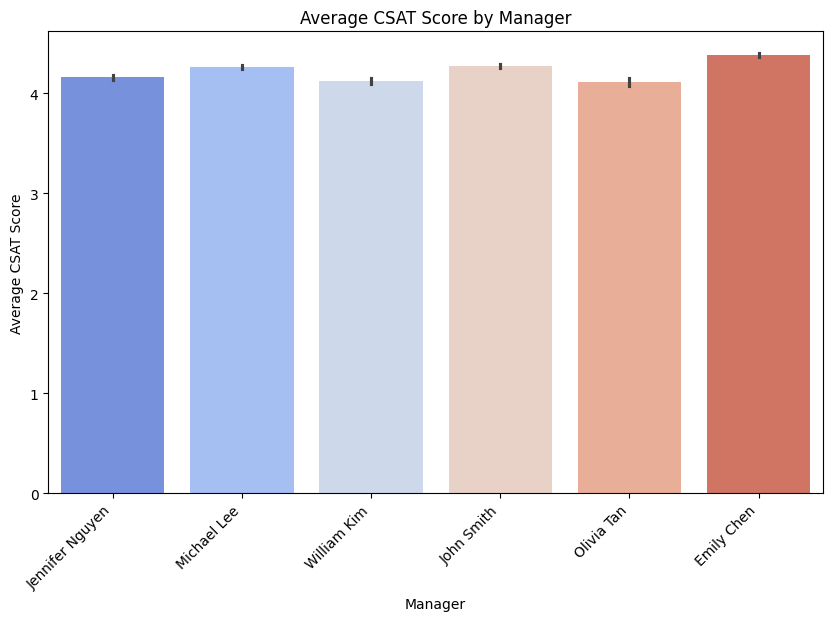

In [36]:
# Chart - 5 visualization code 
# Creating Barplot to visualize the relation between CSAT Score and Managers


plt.figure(figsize=(10,6))
sns.barplot(
    x='Manager',
    y='CSAT Score',
    data=df,
    estimator='mean',
    hue='Manager',       # ensures color mapping is explicit
    palette='coolwarm',
    legend=False
)
plt.title('Average CSAT Score by Manager')
plt.xlabel('Manager')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

To compare how customer satisfaction varies under different managers, helping identify leadership impact on service quality.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are: 
1. Emily Chen has the highest average CSAT score, suggesting her team delivers the best customer experience or issue resolution quality.
2. Olivia Tan and William Kim have slightly lower averages compared to others, indicating require improvement in their team handling or response strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Managers’ teams consistently deliver higher CSAT scores.
2. All managers have CSAT scores above 4, indicating consistently good performance overall.

#### Chart - 6

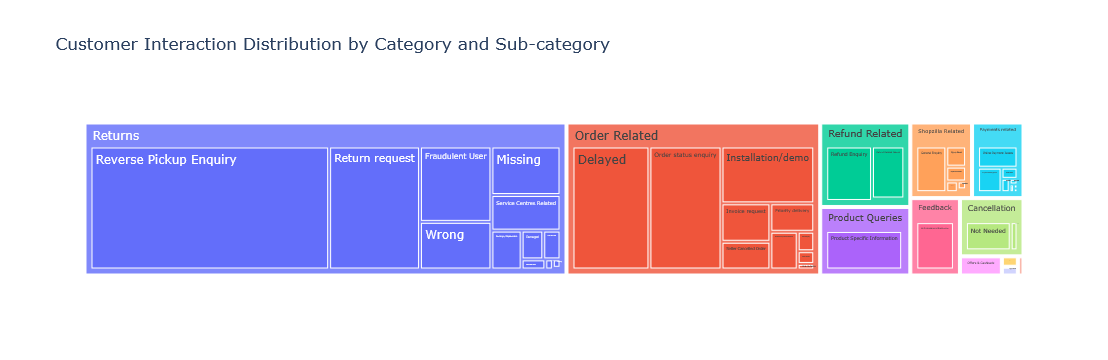

In [38]:
# Chart - 6 visualization code
# Creating Tree Map to find the distribution of category and sub-category
fig = px.treemap(df, 
                 path=['category', 'Sub-category'], 
                 title='Customer Interaction Distribution by Category and Sub-category')
fig.show()

##### 1. Why did you pick the specific chart?

Treemap is excellent choice for showing hierarchical relationships and proportional distribution.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:
1. 'Returns' Category is the highest(44,097 choosen).
2. second highest is 'Order Related'(23215).
3. Lowest is for the value 'Onboarding related'(65).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights give clear idea that,most of the products are returned due to various factors like 'Reverse pickup Enquiry','Wrong product','Missing product','Fraudulent user'. The second Highest category is 'Order Related', which indicates need of upgrade in order related issue.

#### Chart - 7

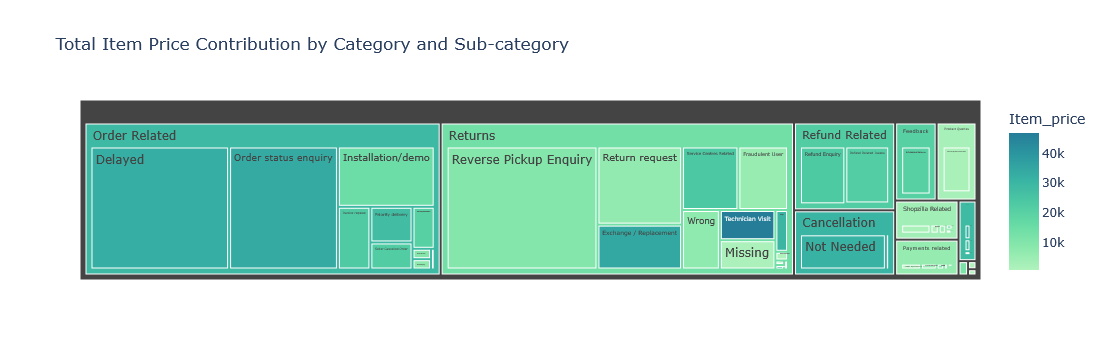

In [39]:
# Chart - 7 visualization code
#Tree map showing Total Item Price contribution by category and sub-category 
fig = px.treemap(df, 
                 path=['category', 'Sub-category'], 
                 values='Item_price', 
                 title='Total Item Price Contribution by Category and Sub-category',
                 color='Item_price',
                 color_continuous_scale='Tealgrn')
fig.show()

##### 1. Why did you pick the specific chart?

This chart helps in knowing the spread of each Sub-Category and category

##### 2. What is/are the insight(s) found from the chart?

1. The highest contribution is from 'Order Related' which is 65746011.
2. The second highest contribution is from 'Returns' which is 65226653, a bit differ from 'order Related'.
3. The lowest Contribution is from 'Onboarding related' which is 63635.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained lead to a positive business impact and growth.The data highlights specific problem areas: 'Delayed' orders are the largest issue in the 'Order Related' are a significant area.These are customers pain points that directly impact satisfaction and loyality.

#### Chart - 8

<Figure size 1000x600 with 0 Axes>

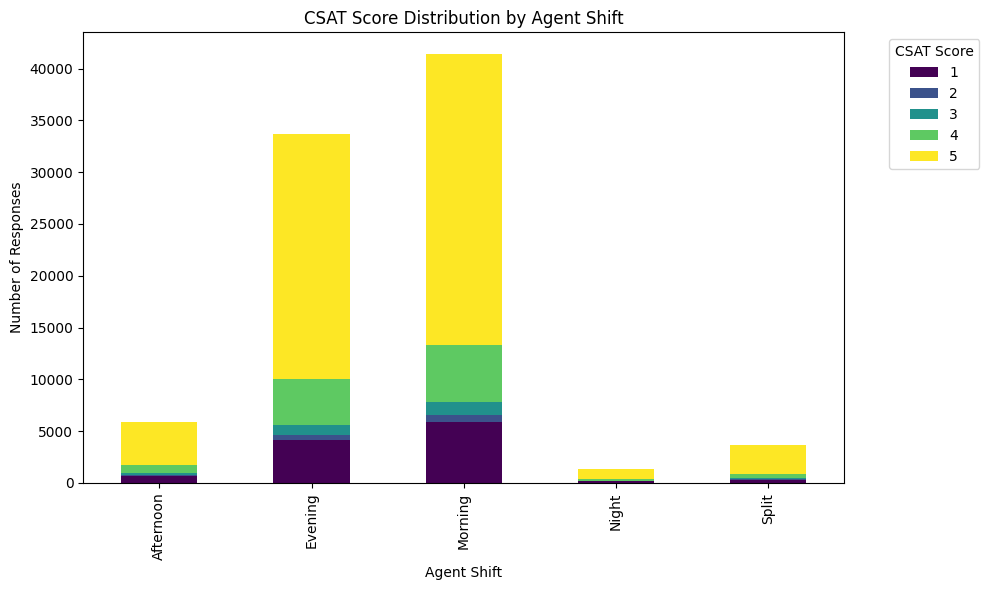

In [40]:
# Chart - 8 visualization code
# Stacked bar Plot representing Agent shift impact on CSAT Score
#Verical Stacked bar plot
plt.figure(figsize=(10,6))
csat_shift = pd.crosstab(df['Agent Shift'], df['CSAT Score'])  # crosstab is used to compute a frequency table of two or more factors
csat_shift.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,6))

plt.title('CSAT Score Distribution by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Responses')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart shows how customer satisfaction (CSAT Score) varies across different agent shifts (e.g., Morning, Afternoon, Night).

##### 2. What is/are the insight(s) found from the chart?

We can easily notice certain shifts like Night , Split have more low CSAT Scores.
The segments inside the bars show how those responses are distributed across satisfaction levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The afternoon shift generated the highest number of tota customer responses, significantly more than the 'Evening shift' while the 'Morning','Night','Split' shifts have relatively low response numbers.

#### Chart - 9

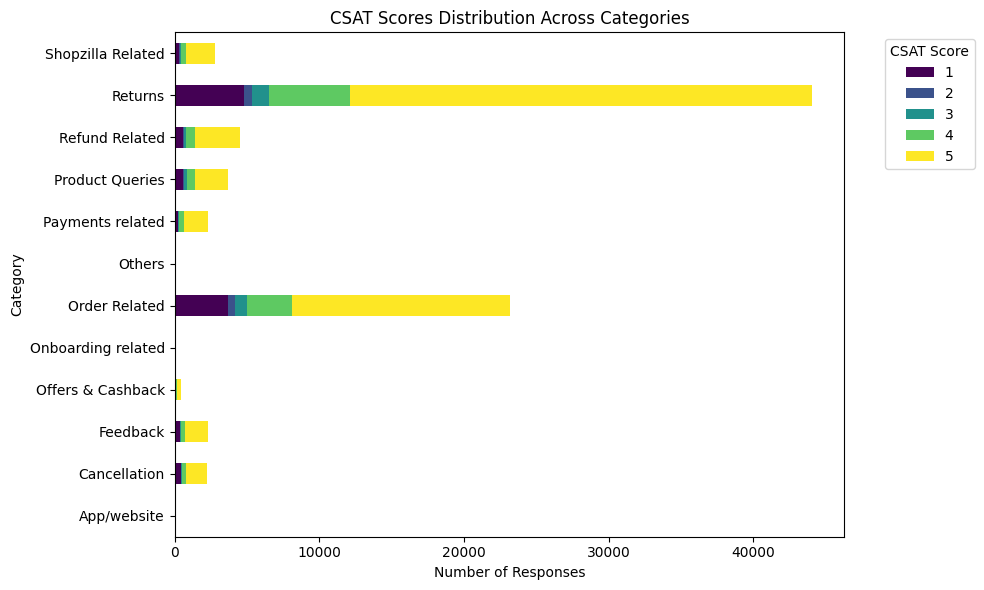

In [41]:
# Chart - 9 visualization code
# Stacked bar Plot representing Categories impact on CSAT Score
#Horixontal stacked bar plot representing spread of scores by each category

fig, ax = plt.subplots(figsize=(10,6))
cat_csat = pd.crosstab(df['category'], df['CSAT Score'])  # crosstab is used to compute a frequency table of two or more factors
cat_csat.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')
ax.set_title('CSAT Scores Distribution Across Categories')
ax.set_xlabel('Number of Responses')
ax.set_ylabel('Category')
ax.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows how customer satisfaction varies across different issue categories.

##### 2. What is/are the insight(s) found from the chart?

1. 'Returns' and 'Order Related' Category have highest number of response.
2. 'Others','Onboarding','Offers & Cashback' Category have lowest number of response. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help creating a positive business impact.
1. Satisfied customer are much more likely to make repeat purchases and remain loyal.
2. The breakdown by category pinpoints exactly where the business is succedding and where it needs to focus resources
3. High satsfaction level directly correlate with increased revenue.

#### Chart - 10

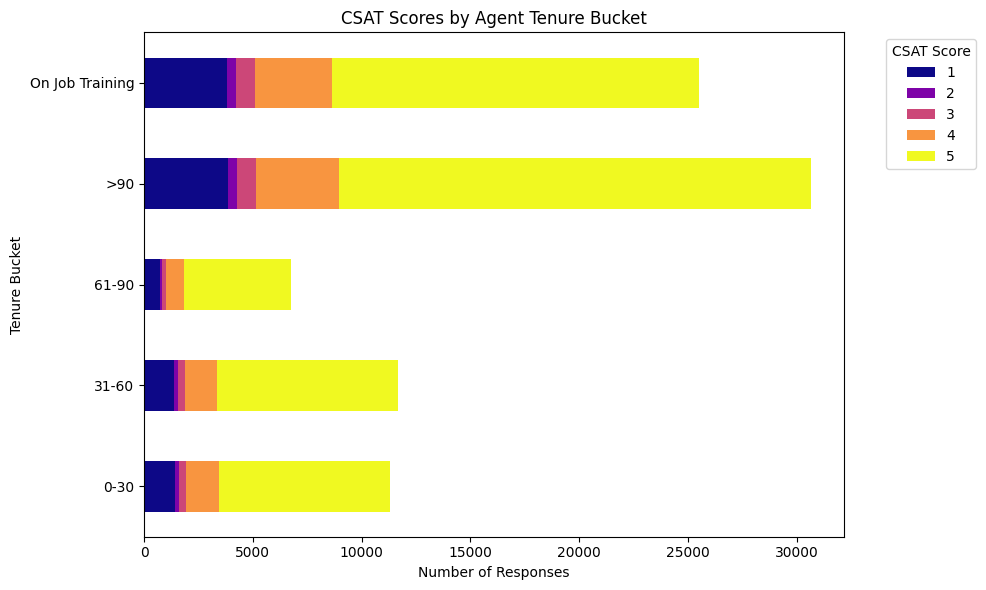

In [42]:
# Chart - 10 visualization code
# Horizontal Stacked bar plot representing : Tenure Bucket vs CSAT Score

fig, ax = plt.subplots(figsize=(10,6))
tenure_csat = pd.crosstab(df['Tenure Bucket'], df['CSAT Score']) # crosstab is used to compute a frequency table of two or more factors
tenure_csat.plot(kind='barh', stacked=True, ax=ax, colormap='plasma')
ax.set_title('CSAT Scores by Agent Tenure Bucket')
ax.set_xlabel('Number of Responses')
ax.set_ylabel('Tenure Bucket')
ax.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows whether agents with longer tenure deliver higher CSAT scores.

##### 2. What is/are the insight(s) found from the chart?

1. The tenure Bucket '>90' and 'On Job Training' have highest number of resposes.
2. Most of the CSAT Score for any Tenure Bucket is 5 , which is greate than 60% of the remaining.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is a clear pattern indicating that as agent tenure increases, the proportion of high CSAT scores generally increases, while lower scores decreases. This suggests that more experienced agents provide better customer services. The graph suggests that training and development programs for new agents should be a focus area to increase their effectiveness and in turn boost customer satisfaction scores.

#### Chart - 11

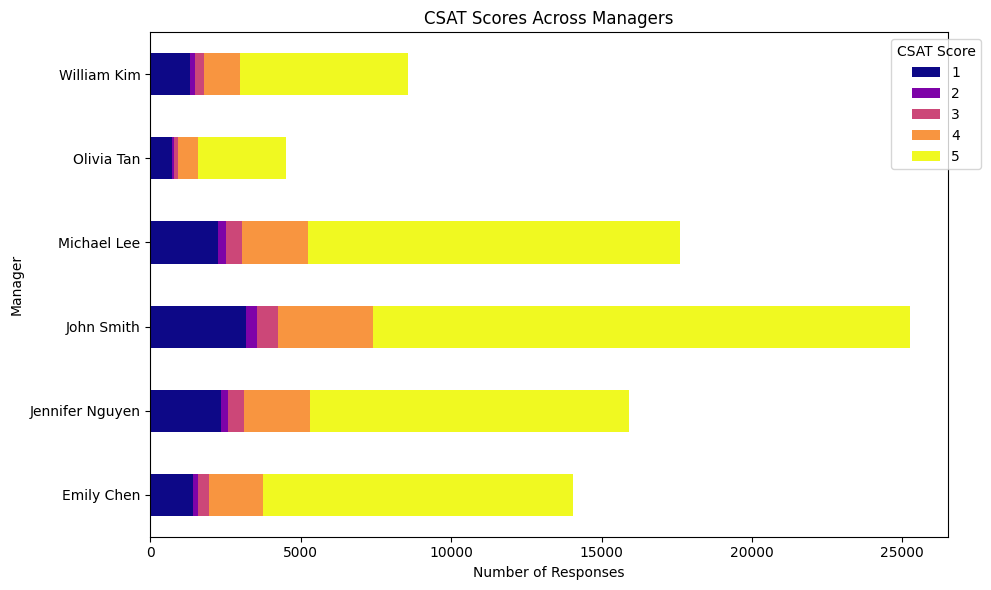

In [50]:
# Chart - 11 visualization code
#Horizontal Stacked Bar plot between Manager and CSAT Score

fig, ax = plt.subplots(figsize=(10,6))
mgr_csat = pd.crosstab(df['Manager'], df['CSAT Score'])  # crosstab is used to compute a frequency table of two or more factors
mgr_csat.plot(kind='barh', stacked=True, ax=ax, colormap='plasma')
ax.set_title('CSAT Scores Across Managers')
ax.set_xlabel('Number of Responses')
ax.set_ylabel('Manager')
ax.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Highlights which managers have teams delivering better customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

1. 'John Smith' have team who provide better customer satisfaction(Responses around 25000) which is mostly contribution to CSAT Score of 5.
2. 'Michael Lee' have team who provide better after 'John Smith' responses received more that 15000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insighs help in creating a positive business impact , apart from Number of responses for each manager, most of the customers given CSAT Score ad 5. which is a impactful factor.

#### Chart - 12

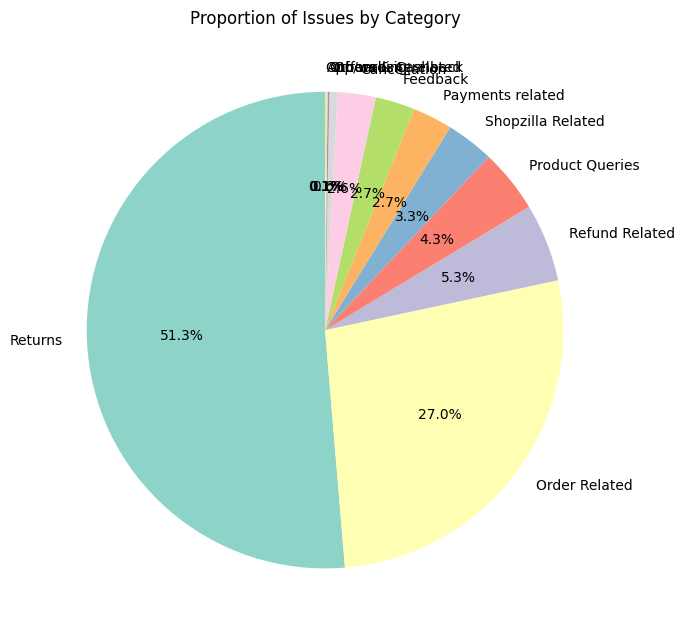

In [44]:
# Chart - 12 visualization code
#Pie Chart on Category Distribution
plt.figure(figsize=(7,7))
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colormap='Set3') 
#the startangle parameter controls the starting position of the first slice of the pie chart
plt.title('Proportion of Issues by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This Chart indicates the proportion of Issues faced by customers in each category

##### 2. What is/are the insight(s) found from the chart?

The 'Returns' is the most common issue to the customers which is 51%. followed by 'Order Related' (27%) , where together leads to the reason for 75% of customers issue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights are likely to create a negative business impact.if the high volume issues are not addressed.The Data highlights significant areas of customer dissatisfaction that, if ignored could lean to lost revenue and damaged reputation.

#### Chart - 13

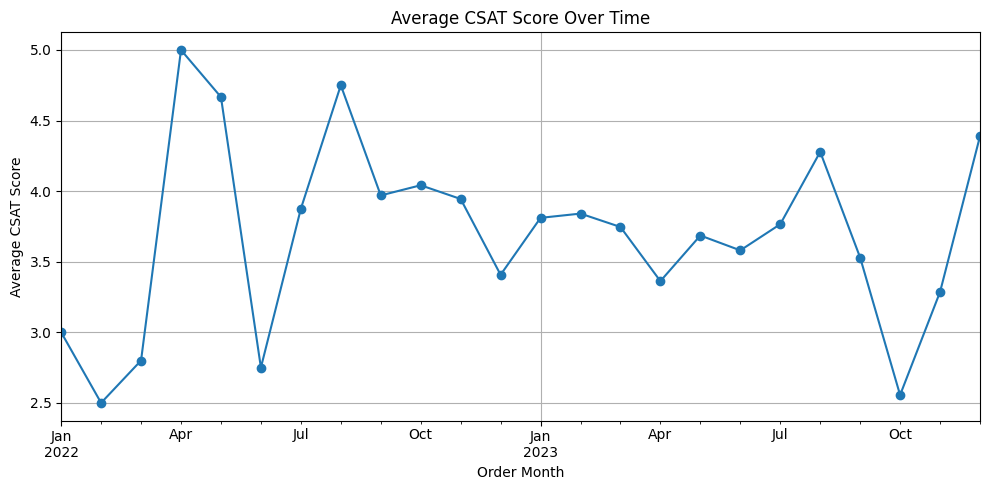

In [45]:
# Chart - 13 visualization code
#line plot on Average CSAT Score Over Time

plt.figure(figsize=(10,5))
df.groupby(df['order_date_time'].dt.to_period('M'))['CSAT Score'].mean().plot(marker='o')
plt.title('Average CSAT Score Over Time')
plt.xlabel('Order Month')
plt.ylabel('Average CSAT Score')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Displays customer satisfaction trends over time — whether it’s improving or declining.

##### 2. What is/are the insight(s) found from the chart?

1. The CSAT Score is highest in'April','August' in 2022.
2. In 2023, the highest CSAT score is in 'Dec',''Aug',which is less that 2022.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The CSAT Score Decreased from 2022 to 2023. in 2022 the highest score is 5 where as is 2023 it is 4.4

#### Chart - 14 - Correlation Heatmap

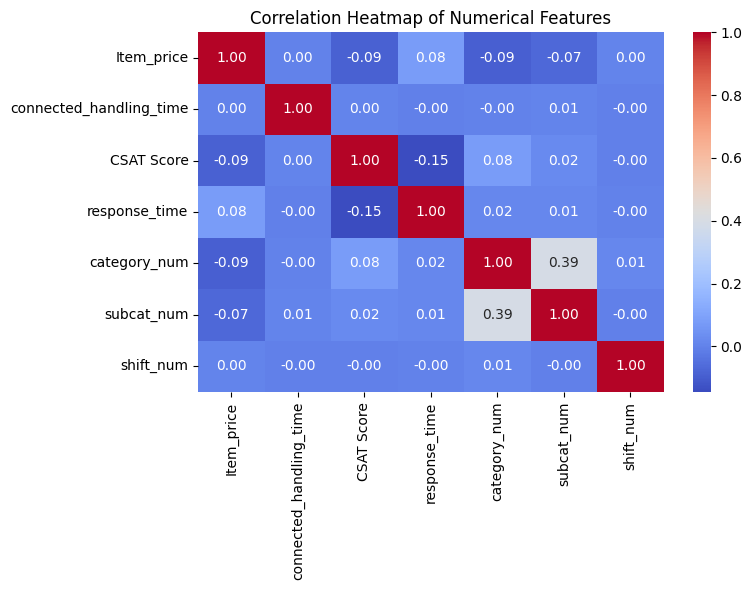

In [48]:
# Correlation Heatmap visualization code
# Correlation Between Numerical Features
# Numerical Columns - CSAT Score,Item_price and response_time

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Reveals relationships between metrics like Item_price, response_time, and CSAT Score.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above heatmap:

1. The correlation with columns,Item_price,CSAT Score,response_time and themself is 1.
2. The correlation of item_rice with response_time and CSAT Score is 0.05,-0.09, which is very low.
3. CSAT Score with response_time,Item_price is -0.09,-0.07 which is also to low.
4. response_time with CSAT Score,Item_price is -0.05,-0.07 which is also to low.

this clearly indicates no correlation between these 3 columns.

#### Chart - 15 - Pair Plot

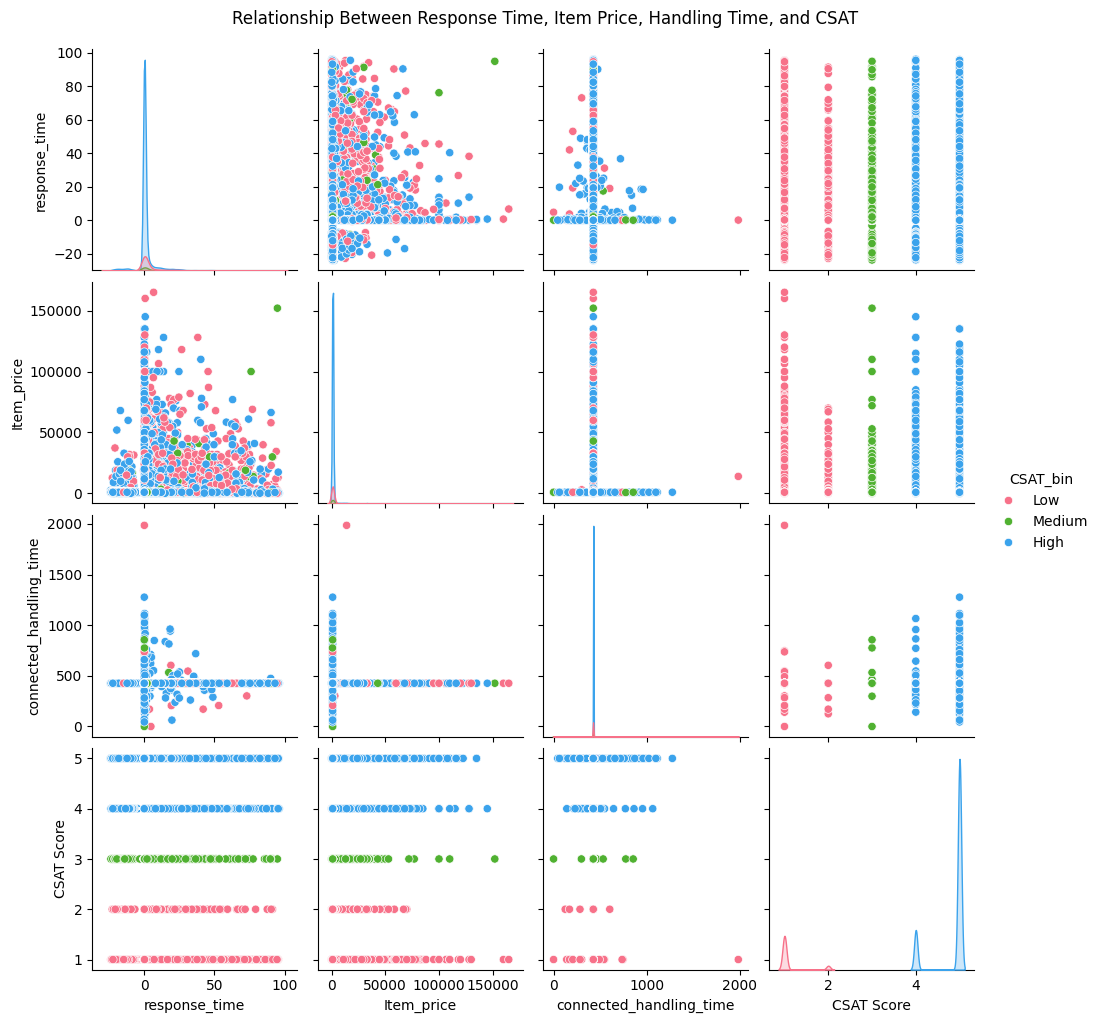

In [49]:
# Pair Plot visualization code
# Relationship Between Key Variables

# Preparing columns for pairplot
pair_df = df[['response_time',
              'Item_price',
              'connected_handling_time',
              'CSAT Score']].dropna()

# Convert CSAT to 3 groups for better hue visualization
pair_df['CSAT_bin'] = pd.cut(pair_df['CSAT Score'],
                             bins=3,
                             labels=['Low', 'Medium', 'High'])

# Final pairplot
sns.pairplot(
    pair_df,
    diag_kind='kde',
    hue='CSAT_bin',
    palette='husl'
)

plt.suptitle('Relationship Between Response Time, Item Price, Handling Time, and CSAT', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot helps to visualize trends for instance. compares relationship across various columns

##### 2. What is/are the insight(s) found from the chart?

The pair plot reveals negative business impacts related to both price and response time. This is because higher values in those metrices correlate with lower customer satisfaction scores.The Data strongly suggests that both increasing prices and slower response times are associated with reduced customer satisfaction.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

The primary business objective of this project is to analyze the given dataset using Exploratory Data Analysis (EDA) techniques to uncover meaningful patterns, trends, and relationships that can guide strategic decision-making. By identifying key factors that influence the CSAT Score.
1. Introduce dynamic pricing during high-demand periods to balance supply and demand effectively.
2. Provide incentives to top-performing employees or service providers based on performance metrics to improve productivity.
3. Offer discounts or loyalty rewards to frequent customers to increase retention.
4. Identify underperforming regions or time slots and design targeted marketing campaigns to boost engagement.

# **Conclusion**

1. The analysis shows service gaps during peak hours, leading to lost revenue. Increasing availability through incentives and optimized scheduling can improve customer satisfaction and profits.
2. Insights reveal uneven demand across locations and times. Adjusting pricing and resource allocation accordingly can enhance efficiency and revenue generation.
3. The data indicates missed opportunities during high-demand periods. Offering targeted incentives to increase availability can boost performance and overall profitability.
4. Patterns suggest that better forecasting and planning can reduce idle time and improve utilization, helping the company achieve sustainable growth.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***